<a href="https://colab.research.google.com/github/Anas10202/mastercard_fraud_detection/blob/main/Mastercard1_CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from geopy.distance import geodesic
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


In [ ]:
df = pd.read_csv('fraudTrain.csv')



In [ ]:
df.shape

(1296675, 23)

## **Exploratory Data Analysis (EDA)**

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df.isnull().sum()


,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [ ]:
df_fraudulent = df[df['is_fraud'] == 1]
df_fraudulent.head(20)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1
2937,2937,2019-01-02 13:38:08,4613314721966,fraud_Medhurst PLC,shopping_net,844.80,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,248c2746e78f2ec713df51254ff1b302,1325511488,35.987802,-81.254332,1
3527,3527,2019-01-02 23:52:08,4613314721966,fraud_Ruecker Group,misc_net,843.91,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,2f7d497f607396ab669c14c2abe3886f,1325548328,35.985612,-81.383306,1
3580,3580,2019-01-03 01:05:27,340187018810220,fraud_Conroy-Cruickshank,gas_transport,10.76,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,0a2f8002e55a3565c5c88d8cf039fed8,1325552727,28.856712,-97.794207,1
3600,3600,2019-01-03 01:35:52,340187018810220,fraud_Koepp-Parker,grocery_pos,332.35,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,97903213a2fd7e53bbaa60807144a505,1325554552,29.320662,-97.937219,1
3671,3671,2019-01-03 03:17:36,340187018810220,fraud_Strosin-Cruickshank,grocery_pos,315.34,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,0ffc2b7dae4c33883f14ac60283d4027,1325560656,28.953283,-97.806528,1


In [ ]:
df = df.drop(columns=['Unnamed: 0'])


The 'Unnamed: 0' column consists of the row number of each credit card transaction entry.

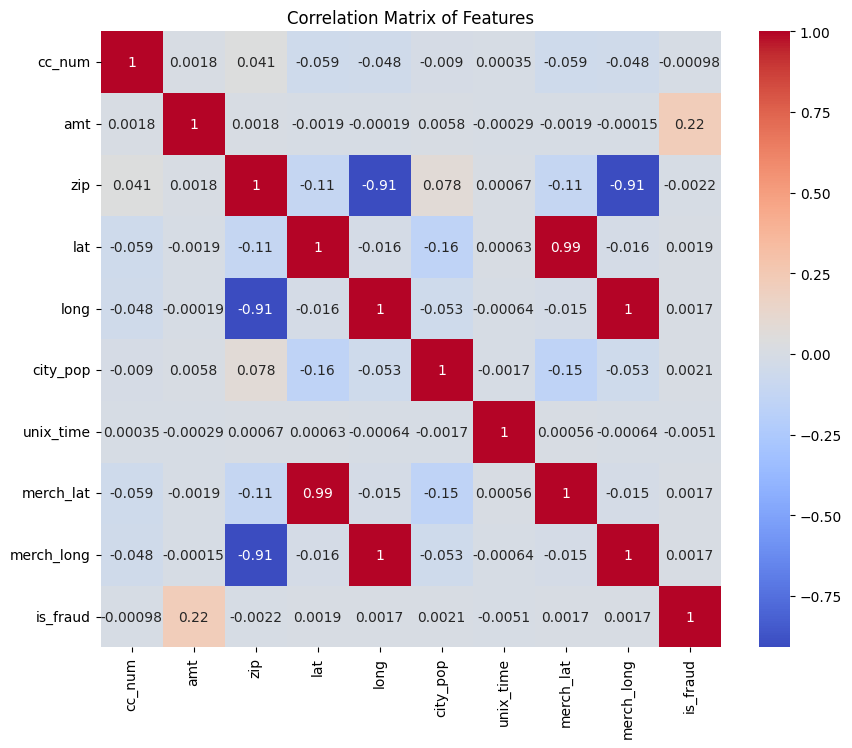

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

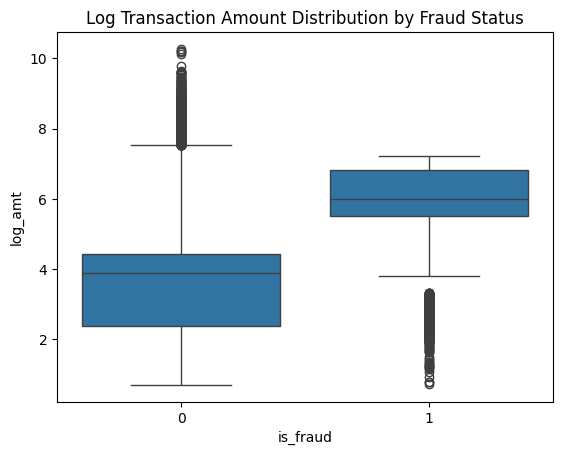

In [ ]:
df['log_amt'] = np.log1p(df['amt'])
sns.boxplot(x='is_fraud', y='log_amt', data=df)
plt.title('Log Transaction Amount Distribution by Fraud Status')
plt.show()


Fraudulent transactions tend to involve higher amounts when compared to non-fraudulent ones, which aligns with the earlier correlation matrix analysis showing a moderate positive correlation between transaction amount (amt) and fraud (is_fraud).

In [ ]:
'''
features = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']
for feature in features:
    plt.figure(figsize=(10, 8))
    sns.histplot(data=df, x=feature, hue='is_fraud', multiple='stack', kde=True)
    plt.title(f'Distribution of {feature} by Fraud Status')
    plt.show()
'''

"\nfeatures = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']\nfor feature in features:\n    plt.figure(figsize=(10, 8))\n    sns.histplot(data=df, x=feature, hue='is_fraud', multiple='stack', kde=True)\n    plt.title(f'Distribution of {feature} by Fraud Status')\n    plt.show()\n"

## **Data Cleaning**


In [ ]:
df = df.drop(columns=['cc_num', 'Unnamed: 0', 'gender'], errors='ignore')

In [ ]:
print(df.isnull().sum())


trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
log_amt                  0
dtype: int64


Since there are no null values, we can conclude there are no missing values in the data set.

In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['month'] = df['trans_date_trans_time'].dt.month


In [ ]:
df['unique_id'] = df['first'] + '_' + df['last'] + '_' + df['street']


unique_id: Combines 'first', 'last', and 'street' to create a unique identifier for individuals.


In [ ]:
df['transaction_count'] = df.groupby('unique_id')['unique_id'].transform('count')


transaction_count: Counts how many transactions are associated with each individual.


In [ ]:
df['fraudulent_transaction_count'] = df.groupby('unique_id')['is_fraud'].transform('sum')


fraudulent_transaction_count: Counts how many fraudulent transactions are associated with each individual.

In [ ]:
df['multiple_fraud_flag'] = df['fraudulent_transaction_count'] >= 1


multiple_fraud_flag: A binary feature to flag individuals with more than one fraudulent transaction.

In [ ]:
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year


From date of birth (dob), we can derive a feature called 'age' to avoid using personal identifiable information.

In [ ]:
# df = pd.get_dummies(df, columns=['city', 'state', 'job'], drop_first=True)


In [ ]:
df = df.drop(columns=['first', 'last', 'street', 'trans_num', 'dob'])


In addition, we will drop features that involve personal identifiable information, such as 'first' and 'last' (name), 'street' (address), and 'dob'. We will also remove 'trans_num', since that will be unique for each transaction and should not add any predictive power in regards to predicting credit card fraud.

In [ ]:
fraud_distribution = df['is_fraud'].value_counts(normalize=True) * 100
print(fraud_distribution)


is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64


As can be seen, this data set is highly disproportional, with a majority of the transactions being non-fraudulent and less than 1% being fraudulent.

In [ ]:
df = df.sort_values(by=['unique_id', 'trans_date_trans_time'])
df['cumsum_amt'] = df.groupby('unique_id')['amt'].cumsum()
df['prev_cumsum_amt'] = df.groupby('unique_id')['cumsum_amt'].shift(1)


Here we are sorting the data by customer through the derived unique IDs and transaction time to ensure calculations occur in the correct order.

We also calculate the running total of how much each customer has spent over time.

Then, we shift this cumulative total to capture how much the customer had spent before the current transaction.

In [ ]:
df['trans_7d_count'] = df.groupby('unique_id').cumcount() + 1
df['prev_trans_count'] = df.groupby('unique_id')['trans_7d_count'].shift(1)
df[['trans_date_trans_time', 'amt', 'trans_7d_count', 'prev_trans_count']].head()


,trans_date_trans_time,amt,trans_7d_count,prev_trans_count
84,2019-01-01 01:02:16,89.11,1,NaN
589,2019-01-01 07:39:00,68.85,2,1.0
954,2019-01-01 12:04:54,47.96,3,2.0
1070,2019-01-01 13:14:46,77.51,4,3.0
1715,2019-01-01 18:14:30,461.28,5,4.0


We created a running transaction count (trans_7d_count) for each customer and shifted the transaction count by one to capture how many transactions occurred before the current transaction.

In [ ]:
df['amt_7d_sum'] = df.groupby('unique_id')['amt'].rolling(window=7, min_periods=1).sum().reset_index(level=0, drop=True)
df['prev_trans_count'].fillna(0, inplace=True)
df['spending_velocity'] = df['amt_7d_sum'] / df['prev_trans_count']
df['spending_velocity'].fillna(0, inplace=True)

<ipython-input-84-e5de1a7a5588>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['prev_trans_count'].fillna(0, inplace=True)
<ipython-input-84-e5de1a7a5588>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Spending velocity (spending_velocity) measures the average amount spent per transaction over a recent time window (7 days in this case). It is a useful feature to detect abnormal spending behavior, which might indicate potential fraud.

In [ ]:
df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'log_amt', 'hour', 'day_of_week', 'month',
       'unique_id', 'transaction_count', 'fraudulent_transaction_count',
       'multiple_fraud_flag', 'age', 'cumsum_amt', 'prev_cumsum_amt',
       'trans_7d_count', 'prev_trans_count', 'amt_7d_sum',
       'spending_velocity'],
      dtype='object')

In [ ]:
# def calculate_distance(row):
#     customer_location = (row['lat'], row['long'])
#     merchant_location = (row['merch_lat'], row['merch_long'])

#     # Check if any of the coordinates are NaN
#     if np.isnan(customer_location).any() or np.isnan(merchant_location).any():
#         return np.nan  # Return NaN if any of the coordinates are missing
#     else:
#         return geodesic(customer_location, merchant_location).kilometers


In [ ]:
# # Apply the function to each row in the DataFrame and store the result in a new 'distance' column
# df['distance'] = df.apply(calculate_distance, axis=1)

# # Display the first few rows of the DataFrame with the latitude, longitude, merchant's coordinates, and the calculated distance
# df[['lat', 'long', 'merch_lat', 'merch_long', 'distance']].head()

In [ ]:
def calculate_distance_vectorized(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371
    return c * r

df['distance'] = calculate_distance_vectorized(df['lat'], df['long'], df['merch_lat'], df['merch_long'])
df[['lat', 'long', 'merch_lat', 'merch_long', 'distance']].head()

,lat,long,merch_lat,merch_long,distance
84,39.7795,-93.3014,40.773306,-92.821257,117.773649
589,39.7795,-93.3014,38.795002,-94.219522,135.007305
954,39.7795,-93.3014,39.206677,-93.033773,67.708392
1070,39.7795,-93.3014,40.759427,-93.539051,110.812606
1715,39.7795,-93.3014,39.656496,-92.400368,78.270114


We created a new feature that calculates the distance between the customer and the merchant for each transaction. Using the `geodesic()` function from the `geopy` library, we computed the distance in kilometers based on the latitude and longitude of both the customer and merchant. This was applied row-by-row to the DataFrame, and the resulting distances were stored in a new column, `distance`. This feature helps detect potentially fraudulent transactions that occur far from the customer's typical location.

In [ ]:
df['fraud_7d_flag'] = df.groupby('unique_id')['is_fraud'].apply(
    lambda x: x.rolling(window=7, min_periods=1).sum()
).reset_index(level=0, drop=True)
df['fraud_7d_flag'] = df['fraud_7d_flag'].apply(lambda x: 1 if x > 0 else 0)
df[['trans_date_trans_time', 'is_fraud', 'fraud_7d_flag']].head()


,trans_date_trans_time,is_fraud,fraud_7d_flag
84,2019-01-01 01:02:16,0,0
589,2019-01-01 07:39:00,0,0
954,2019-01-01 12:04:54,0,0
1070,2019-01-01 13:14:46,0,0
1715,2019-01-01 18:14:30,0,0


In this code, we created a new feature, `fraud_7d_flag`, to track whether a customer has committed any fraudulent transactions in the past 7 days. First, we used a rolling window of 7 days within each customer group to sum the fraudulent transactions. Then, we converted this sum into a binary flag, where `1` indicates at least one fraud within the past 7 days and `0` indicates none. The resulting feature helps to identify customers with recent fraudulent activity, which can be useful for detecting suspicious patterns.

In [ ]:
df = df.drop(columns=['zip'])

In [ ]:
print(df.isnull().sum())
df.dropna(subset=['prev_trans_count'], inplace=True)
print(df.isnull().sum())

trans_date_trans_time             0
merchant                          0
category                          0
amt                               0
city                              0
state                             0
lat                               0
long                              0
city_pop                          0
job                               0
unix_time                         0
merch_lat                         0
merch_long                        0
is_fraud                          0
log_amt                           0
hour                              0
day_of_week                       0
month                             0
unique_id                         0
transaction_count                 0
fraudulent_transaction_count      0
multiple_fraud_flag               0
age                               0
cumsum_amt                        0
prev_cumsum_amt                 983
trans_7d_count                    0
prev_trans_count                  0
amt_7d_sum                  

In [ ]:
# Dropping any remaining unnecessary columns
df = df.drop(columns=[
    'cc_num', 'Unnamed', 'gender',
    'first', 'last', 'street',
    'trans_num', 'dob',
    'zip','merch_lat', 'merch_long',
    'city', 'state', 'job','hour', 'day_of_week', 'month','lat','long'
], errors='ignore')

# Checking for any remaining object-type columns that might not be needed
remaining_object_cols = df.select_dtypes(include=['object']).columns
print("Remaining object columns:", remaining_object_cols)

# Dropping any remaining object columns if they are still present
df = df.drop(columns=remaining_object_cols, errors='ignore')

# Final check to ensure no unwanted columns remain
df.info()

Remaining object columns: Index(['merchant', 'category', 'unique_id'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 84 to 1293360
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   trans_date_trans_time         1296675 non-null  datetime64[ns]
 1   amt                           1296675 non-null  float64       
 2   city_pop                      1296675 non-null  int64         
 3   unix_time                     1296675 non-null  int64         
 4   is_fraud                      1296675 non-null  int64         
 5   log_amt                       1296675 non-null  float64       
 6   transaction_count             1296675 non-null  int64         
 7   fraudulent_transaction_count  1296675 non-null  int64         
 8   multiple_fraud_flag           1296675 non-null  bool          
 9   age                           1296675 non-null  int

In [ ]:
df.head()

,trans_date_trans_time,amt,city_pop,unix_time,is_fraud,log_amt,transaction_count,fraudulent_transaction_count,multiple_fraud_flag,age,cumsum_amt,prev_cumsum_amt,trans_7d_count,prev_trans_count,amt_7d_sum,spending_velocity,distance,fraud_7d_flag
84,2019-01-01 01:02:16,89.11,964,1325379736,0,4.501031,2050,8,True,45,89.11,NaN,1,0.0,89.11,inf,117.773649,0
589,2019-01-01 07:39:00,68.85,964,1325403540,0,4.246350,2050,8,True,45,157.96,89.11,2,1.0,157.96,157.960000,135.007305,0
954,2019-01-01 12:04:54,47.96,964,1325419494,0,3.891004,2050,8,True,45,205.92,157.96,3,2.0,205.92,102.960000,67.708392,0
1070,2019-01-01 13:14:46,77.51,964,1325423686,0,4.363226,2050,8,True,45,283.43,205.92,4,3.0,283.43,94.476667,110.812606,0
1715,2019-01-01 18:14:30,461.28,964,1325441670,0,6.136171,2050,8,True,45,744.71,283.43,5,4.0,744.71,186.177500,78.270114,0


In [ ]:
df.columns

Index(['trans_date_trans_time', 'amt', 'city_pop', 'unix_time', 'is_fraud',
       'log_amt', 'transaction_count', 'fraudulent_transaction_count',
       'multiple_fraud_flag', 'age', 'cumsum_amt', 'prev_cumsum_amt',
       'trans_7d_count', 'prev_trans_count', 'amt_7d_sum', 'spending_velocity',
       'distance', 'fraud_7d_flag'],
      dtype='object')

In [ ]:
datetime_cols = df.select_dtypes(include=['datetime', 'datetimetz']).columns
print(f"Datetime columns: {datetime_cols}")


Datetime columns: Index(['trans_date_trans_time'], dtype='object')


In [ ]:
for col in datetime_cols:
    df[col] = df[col].astype('int64') // 10**9  # Convert to Unix timestamp

In [ ]:
# X = X.drop(columns=datetime_cols, errors='ignore')

In [ ]:
# remaining_object_cols = df.select_dtypes(include=['object']).columns
# print("Remaining object columns in X_train:", remaining_object_cols)

In [ ]:
df.head()

,trans_date_trans_time,amt,city_pop,unix_time,is_fraud,log_amt,transaction_count,fraudulent_transaction_count,multiple_fraud_flag,age,cumsum_amt,prev_cumsum_amt,trans_7d_count,prev_trans_count,amt_7d_sum,spending_velocity,distance,fraud_7d_flag
84,1546304536,89.11,964,1325379736,0,4.501031,2050,8,True,45,89.11,NaN,1,0.0,89.11,inf,117.773649,0
589,1546328340,68.85,964,1325403540,0,4.246350,2050,8,True,45,157.96,89.11,2,1.0,157.96,157.960000,135.007305,0
954,1546344294,47.96,964,1325419494,0,3.891004,2050,8,True,45,205.92,157.96,3,2.0,205.92,102.960000,67.708392,0
1070,1546348486,77.51,964,1325423686,0,4.363226,2050,8,True,45,283.43,205.92,4,3.0,283.43,94.476667,110.812606,0
1715,1546366470,461.28,964,1325441670,0,6.136171,2050,8,True,45,744.71,283.43,5,4.0,744.71,186.177500,78.270114,0


In [ ]:
y = df['is_fraud']
y.dropna(inplace=True)


In [ ]:
X = df.drop(columns=['is_fraud'])
print(X.isnull().sum())
X.dropna(inplace=True)


trans_date_trans_time             0
amt                               0
city_pop                          0
unix_time                         0
log_amt                           0
transaction_count                 0
fraudulent_transaction_count      0
multiple_fraud_flag               0
age                               0
cumsum_amt                        0
prev_cumsum_amt                 983
trans_7d_count                    0
prev_trans_count                  0
amt_7d_sum                        0
spending_velocity                 0
distance                          0
fraud_7d_flag                     0
dtype: int64


In [ ]:
X, y = X.align(y, join='inner', axis=0)

print(X.shape, y.shape)


(1295692, 17) (1295692,)


# Data Preparation

In [ ]:
from imblearn.over_sampling import SMOTE
ros=SMOTE(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
print("Resampled X shape:", X_resampled.shape)
print("Resampled y shape:", y_resampled.shape)

Resampled X shape: (2576522, 17)
Resampled y shape: (2576522,)


In [ ]:
print("Original dataset class distribution:", np.bincount(y))
print("Resampled dataset class distribution:", np.bincount(y_resampled))


Original dataset class distribution: [1288261    7431]
Resampled dataset class distribution: [1288261 1288261]


In [ ]:
X_resampled.head()

,trans_date_trans_time,amt,city_pop,unix_time,log_amt,transaction_count,fraudulent_transaction_count,multiple_fraud_flag,age,cumsum_amt,prev_cumsum_amt,trans_7d_count,prev_trans_count,amt_7d_sum,spending_velocity,distance,fraud_7d_flag
0,1546328340,68.85,964,1325403540,4.246350,2050,8,True,45,157.96,89.11,2,1.0,157.96,157.960000,135.007305,0
1,1546344294,47.96,964,1325419494,3.891004,2050,8,True,45,205.92,157.96,3,2.0,205.92,102.960000,67.708392,0
2,1546348486,77.51,964,1325423686,4.363226,2050,8,True,45,283.43,205.92,4,3.0,283.43,94.476667,110.812606,0
3,1546366470,461.28,964,1325441670,6.136171,2050,8,True,45,744.71,283.43,5,4.0,744.71,186.177500,78.270114,0
4,1546372940,71.62,964,1325448140,4.285240,2050,8,True,45,816.33,744.71,6,5.0,816.33,163.266000,73.649673,0


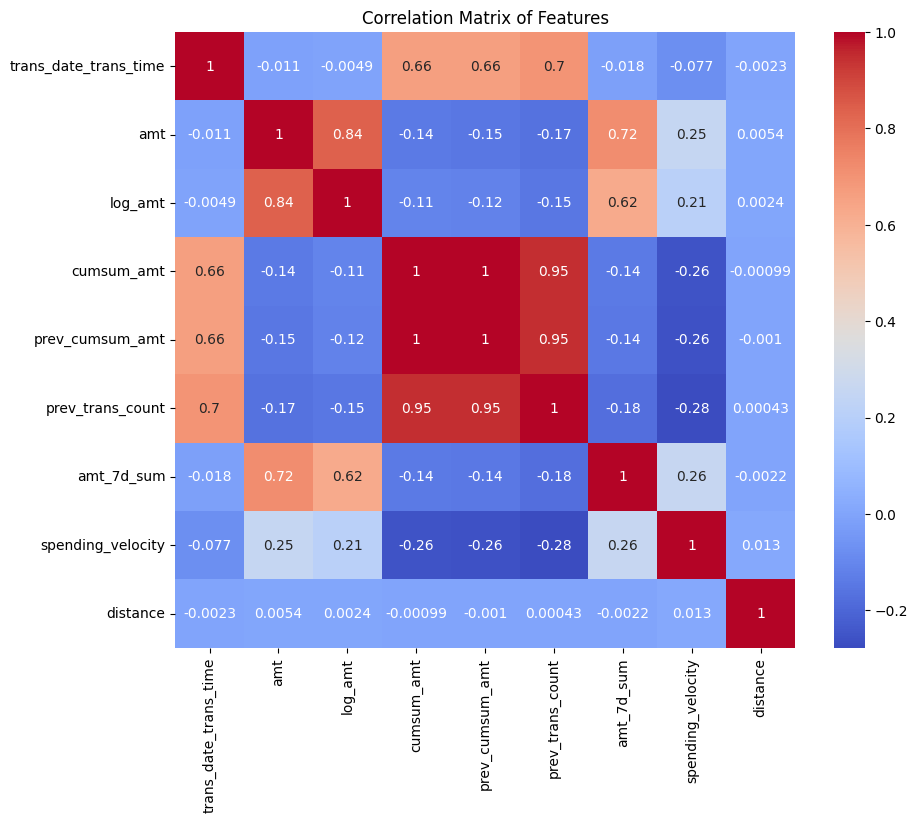

In [ ]:
numeric_df = X_resampled.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
X_resampled = X_resampled.drop(['trans_date_trans_time', 'unix_time', 'fraudulent_transaction_count', 'multiple_fraud_flag',
                      'cumsum_amt', 'prev_cumsum_amt'], axis=1)
X_resampled.head()

,amt,city_pop,log_amt,transaction_count,age,trans_7d_count,prev_trans_count,amt_7d_sum,spending_velocity,distance,fraud_7d_flag
0,68.85,964,4.246350,2050,45,2,1.0,157.96,157.960000,135.007305,0
1,47.96,964,3.891004,2050,45,3,2.0,205.92,102.960000,67.708392,0
2,77.51,964,4.363226,2050,45,4,3.0,283.43,94.476667,110.812606,0
3,461.28,964,6.136171,2050,45,5,4.0,744.71,186.177500,78.270114,0
4,71.62,964,4.285240,2050,45,6,5.0,816.33,163.266000,73.649673,0


In [ ]:
y_resampled.head()

,is_fraud
0,0
1,0
2,0
3,0
4,0


# Data Modeling

In [ ]:
# Assuming X and y are already defined as per your previous steps
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Initialize logistic regression model
lr_model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # You can adjust n_splits

# Store results
accuracy_scores = []

# K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the scaler on the training set and transform both train and test sets
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit the model
    lr_model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Analyze results
print(f"Accuracy scores for each fold: {accuracy_scores}")
print(f"Mean accuracy: {np.mean(accuracy_scores)}")
print(f"Standard deviation of accuracy: {np.std(accuracy_scores)}")


Accuracy scores for each fold: [0.9983367999413442, 0.9984564268597163, 0.9981129745540986, 0.9984641387986324, 0.9984641387986324]
Mean accuracy: 0.9983668957904847
Standard deviation of accuracy: 0.0001358749219306342


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


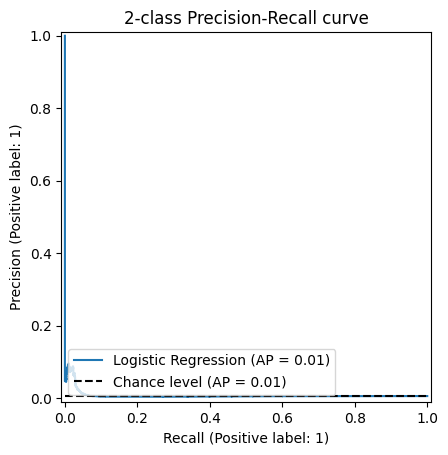

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    lr_model, X_test, y_test, name="Logistic Regression", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


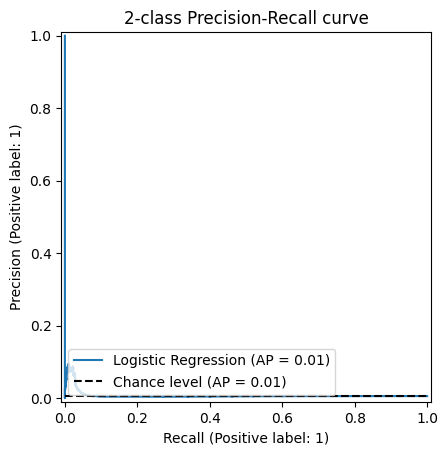

In [ ]:
y_score = lr_model.decision_function(X_test)

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="Logistic Regression", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc

y_score = lr_model.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test, y_score)
print(average_precision)

#precision, recall, thresholds = precision_recall_curve(y_test, y_score)
#auc_precision_recall = auc(recall, precision)
#print(auc_precision_recall)

0.007298390349315973


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Initialize the Standard Scaler
scaler = StandardScaler()

# Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
accuracy_scores = []
classification_reports = []

# K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    # Split the resampled data
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the scaler on the training set and transform both train and test sets
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit the Random Forest model
    rf_model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = rf_model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Get the classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)

# Analyze results
print(f"Accuracy scores for each fold: {accuracy_scores}")
print(f"Mean accuracy: {np.mean(accuracy_scores)}")
print(f"Standard deviation of accuracy: {np.std(accuracy_scores)}")



Accuracy scores for each fold: [0.9991471758399932, 0.999189624101351, 0.9992166336083477, 0.9990892883328574, 0.999286094667706]
Mean accuracy: 0.999185763310051
Standard deviation of accuracy: 6.607673785116196e-05


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Neural Network
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)) )  # Using Input layer for the first layer
model.add(Dense(64, activation='relu'))  # First hidden layer
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=11, batch_size=32, verbose=1)

y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32").flatten()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print(report)

Epoch 1/11
64414/64414 ━━━━━━━━━━━━━━━━━━━━ 199s 3ms/step - accuracy: 0.9958 - loss: 0.0178
Epoch 2/11
64414/64414 ━━━━━━━━━━━━━━━━━━━━ 149s 2ms/step - accuracy: 0.9983 - loss: 0.0101
Epoch 3/11
64414/64414 ━━━━━━━━━━━━━━━━━━━━ 133s 2ms/step - accuracy: 0.9983 - loss: 0.0098
Epoch 4/11
64414/64414 ━━━━━━━━━━━━━━━━━━━━ 150s 2ms/step - accuracy: 0.9983 - loss: 0.0093
Epoch 5/11
64414/64414 ━━━━━━━━━━━━━━━━━━━━ 148s 2ms/step - accuracy: 0.9983 - loss: 0.0099
Epoch 6/11
64414/64414 ━━━━━━━━━━━━━━━━━━━━ 141s 2ms/step - accuracy: 0.9983 - loss: 0.0102
Epoch 7/11
64414/64414 ━━━━━━━━━━━━━━━━━━━━ 141s 2ms/step - accuracy: 0.9983 - loss: 0.0119
Epoch 8/11
64414/64414 ━━━━━━━━━━━━━━━━━━━━ 139s 2ms/step - accuracy: 0.9984 - loss: 0.0096
Epoch 9/11
64414/64414 ━━━━━━━━━━━━━━━━━━━━ 148s 2ms/step - accuracy: 0.9984 - loss: 0.0098
Epoch 10/11
64414/64414 ━━━━━━━━━━━━━━━━━━━━ 201s 2ms/step - accuracy: 0.9983 - loss: 0.0111
Epoch 11/11
64414/64414 ━━━━━━━━━━━━━━━━━━━━ 202s 2ms/step - accuracy: 0.9983 -

In [ ]:
# # Check for datetime columns
# datetime_cols = X_train.select_dtypes(include=['datetime', 'datetimetz']).columns
# print(f"Datetime columns: {datetime_cols}")


In [ ]:
# # Convert datetime columns to Unix timestamp
# for col in datetime_cols:
#     X_train[col] = X_train[col].astype('int64') // 10**9  # Convert to Unix timestamp
#     X_test[col] = X_test[col].astype('int64') // 10**9  # Ensure the test set is also converted


In [ ]:
# # Drop datetime columns if not needed
# X_train = X_train.drop(columns=datetime_cols, errors='ignore')
# X_test = X_test.drop(columns=datetime_cols, errors='ignore')


In [ ]:
# # Check for remaining object columns in X_train
# remaining_object_cols = X_train.select_dtypes(include=['object']).columns
# print("Remaining object columns in X_train:", remaining_object_cols)


In [ ]:
# # Dropping any remaining unnecessary columns
# df = df.drop(columns=[
#     'cc_num', 'Unnamed', 'gender',
#     'first', 'last', 'street',
#     'trans_num', 'dob',
#     'zip','merch_lat', 'merch_long',
#     'city', 'state', 'job'
# ], errors='ignore')

# # Checking for any remaining object-type columns that might not be needed
# remaining_object_cols = df.select_dtypes(include=['object']).columns
# print("Remaining object columns:", remaining_object_cols)

# # Dropping any remaining object columns if they are still present
# df = df.drop(columns=remaining_object_cols, errors='ignore')

# # Final check to ensure no unwanted columns remain
# print(df.info())
# print(df.head())

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weights_dict = dict(zip(np.unique(y_resampled), class_weights))
scale_pos_weight = class_weights_dict[1] / class_weights_dict[0]

xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42, scale_pos_weight=scale_pos_weight)


kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
accuracy_scores = []
classification_reports = []

for train_index, test_index in kf.split(X_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the XGBoost model
    xgb_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = xgb_model.predict(X_test)

    # Calculate accuracy and collect metrics
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)

# Analyze results
print(f"Accuracy scores for each fold: {accuracy_scores}")
print(f"Mean accuracy: {np.mean(accuracy_scores)}")
print(f"Standard deviation of accuracy: {np.std(accuracy_scores)}")

Accuracy scores for each fold: [0.999536197009538, 0.999454691881507, 0.9994973840684334, 0.999454690823281, 0.9994663344355953]
Mean accuracy: 0.9994818596436709
Standard deviation of accuracy: 3.1339499937755005e-05


In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.3],
    'scale_pos_weight': [1, 3, 5]  # Adjust for your class imbalance
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_resampled, y_resampled)

print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 